In [1]:
import os
import fnmatch

import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import binned_statistic_2d

from GHEAnalysisLib import import_all_spain_data_sets_in_dir_to_dataframe
from GHEAnalysisLib import load_stored_dataframes_from_csv_to_single_dataframe
from GHEAnalysisLib import write_annual_csv_files
from GHEAnalysisLib import get_spain_resource_files

import matplotlib.pyplot as plt
%matplotlib inline

from CoolProp.CoolProp import PropsSI

import numpy as np

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['font.size'] = 14

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Import raw data from original files

Repository contains daily data files that contain minutely data. Data are imported by year (except for year 2011) due to the repository data structure. It can take some time to import all of the data files. As is, on my machine it took 1-2 hours to import all of the data from the individual files.

Note: some of the cells are commented out because later work supercedes their usage. They are preserved in comments though.

In [3]:
# data_2005 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2005'
# df_2005 = import_all_spain_data_sets_in_dir_to_dataframe(data_2005)

In [4]:
# data_2006 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2006'
# df_2006 = import_all_spain_data_sets_in_dir_to_dataframe(data_2006)

In [5]:
# data_2007 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2007'
# df_2007 = import_all_spain_data_sets_in_dir_to_dataframe(data_2007)

In [6]:
# data_2008 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2008'
# df_2008 = import_all_spain_data_sets_in_dir_to_dataframe(data_2008)

In [7]:
# data_2009 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2009'
# df_2009 = import_all_spain_data_sets_in_dir_to_dataframe(data_2009)

In [8]:
# data_2010= 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2010'
# df_2010 = import_all_spain_data_sets_in_dir_to_dataframe(data_2010)

In [9]:
# data_2011_a = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2011'
# df_2011_a = import_all_spain_data_sets_in_dir_to_dataframe(data_2011_a)

In [10]:
# data_2011_b = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2011'
# df_2011_b = import_all_spain_data_sets_in_dir_to_dataframe(data_2011_b)

In [11]:
# data_2012 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2012'
# df_2012 = import_all_spain_data_sets_in_dir_to_dataframe(data_2012)

In [12]:
# data_2013 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2013'
# df_2013 = import_all_spain_data_sets_in_dir_to_dataframe(data_2013)

In [13]:
# data_2014 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2014'
# df_2014 = import_all_spain_data_sets_in_dir_to_dataframe(data_2014)

In [14]:
# data_2015 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2015'
# df_2015 = import_all_spain_data_sets_in_dir_to_dataframe(data_2015)

# Dump the data to annual data files (almost)

Since it takes so long to import all of the original data files, the files are dumped to a CSV file which make it easier to reimport the raw data when needed.

Data are dumped to CSV files, but Pandas supports a number of other file types. When testing HDF5, the read/write speed was much faster than for CSV files, however, CSV files have the advantage in that they are human readable, whereas HDF5 is binary.

In [15]:
# See example here for how to read/write HDF5 data
# https://stackoverflow.com/a/17098736/5965685

# df_2005.to_csv('.\\UPV_Data\\Raw\\2005_Raw.csv')

In [16]:
# df_2006.to_csv('.\\UPV_Data\\Raw\\2006_Raw.csv')

In [17]:
# df_2007.to_csv('.\\UPV_Data\\Raw\\2007_Raw.csv')

In [18]:
# df_2008.to_csv('.\\UPV_Data\\Raw\\2008_Raw.csv')

In [19]:
# df_2009.to_csv('.\\UPV_Data\\Raw\\2009_Raw.csv')

In [20]:
# df_2010.to_csv('.\\UPV_Data\\Raw\\2010_Raw.csv')

In [21]:
# df_2011_a.to_csv('.\\UPV_Data\\Raw\\2011_a_Raw.csv')

In [22]:
# df_2011_b.to_csv('.\\UPV_Data\\Raw\\2011_b_Raw.csv')

In [23]:
# df_2012.to_csv('.\\UPV_Data\\Raw\\2012_Raw.csv')

In [24]:
# df_2013.to_csv('.\\UPV_Data\\Raw\\2013_Raw.csv')

In [25]:
# df_2014.to_csv('.\\UPV_Data\\Raw\\2014_Raw.csv')

In [26]:
# df_2015.to_csv('.\\UPV_Data\\Raw\\2015_Raw.csv')

# Incorporate reference data

The data repository contains the raw __20 second interval__, numeric data, but it also contains __daily__ qualitative data which indicates if the system is "ON/OFF" if the data is valid ("YES/NO").

These data have to be merged before any analysis can occur

In [27]:
# df_raw = load_stored_dataframes_from_csv_to_single_dataframe('.\\UPV_Data\\Raw')

In [28]:
# df_ref = get_spain_resource_files('..\\Ruiz-Calvo_et_al_2016_data')

In [29]:
# https://stackoverflow.com/questions/49182288/combine-dataframes-with-minute-and-date-indexes

# df_merge = pd.merge_asof(df_raw, df_ref, left_index=True, right_index=True)

In [30]:
# mask_valid = df_merge['Representative Data'] == 'YES'

In [31]:
# df_valid = df_merge[mask_valid].copy()

In [32]:
# mask_on = df_merge['Sys Working'] == 'ON'

In [33]:
# df_valid_on = df_merge[mask_valid & mask_on].copy()

# Finally, we have data which can be used

The data are dumped to annual CSV files for ease of usage later.

In [34]:
# write_annual_csv_files(df_valid, 2005, 2015, '.\\UPV_Data\\Raw_DeDuped_Valid', 'Raw_DeDuped_Valid')

In [35]:
# write_annual_csv_files(df_valid_on, 2005, 2015, '.\\UPV_Data\\Raw_DeDuped_Valid_On', 'Raw_DeDuped_Valid_On')

In [36]:
df_orig = load_stored_dataframes_from_csv_to_single_dataframe('./UPV_Data/Raw_DeDuped_Valid_On')

Reading 2005_Raw_DeDuped_Valid_On.csv
Reading 2006_Raw_DeDuped_Valid_On.csv
Reading 2007_Raw_DeDuped_Valid_On.csv
Reading 2008_Raw_DeDuped_Valid_On.csv
Reading 2009_Raw_DeDuped_Valid_On.csv
Reading 2010_Raw_DeDuped_Valid_On.csv
Reading 2011_Raw_DeDuped_Valid_On.csv


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Reading 2012_Raw_DeDuped_Valid_On.csv
Reading 2013_Raw_DeDuped_Valid_On.csv
Reading 2014_Raw_DeDuped_Valid_On.csv
Reading 2015_Raw_DeDuped_Valid_On.csv
Dataframes loaded successfully


In [37]:
# Keep copy of original so we don't have to reload it everytime we need to reset the DataFrames

df = df_orig.copy()

## Investigating negative mass flow rate or power meter readings.

Some of the power and mass flow readings are negative as can be seen in the following plots.

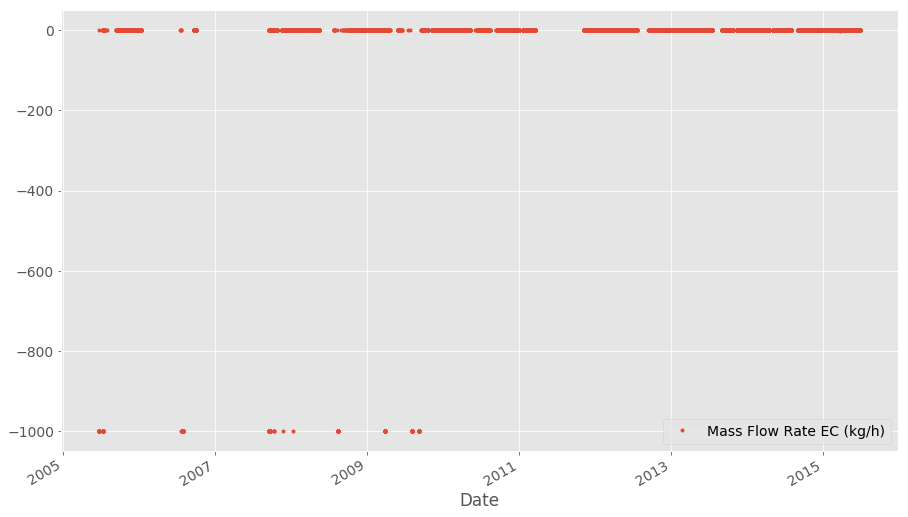

In [38]:
df[df['Mass Flow Rate EC (kg/h)'] < 0].plot(y='Mass Flow Rate EC (kg/h)', linestyle="None", marker='.')

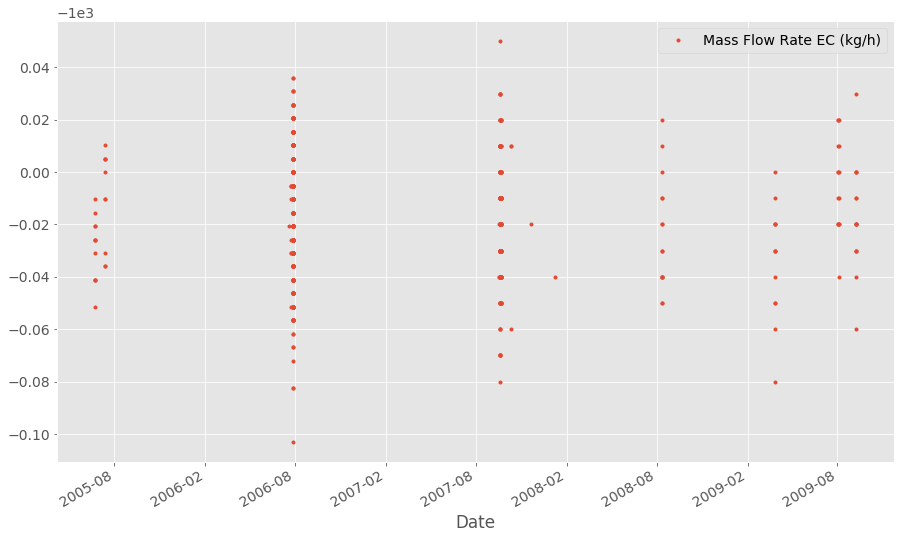

In [39]:
df[df['Mass Flow Rate EC (kg/h)'] < -200].plot(y='Mass Flow Rate EC (kg/h)', linestyle="None", marker='.')

In [40]:
df[df['Mass Flow Rate EC (kg/h)'] < -200].describe()

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),B6_1 (C),B6_2 (C),B6_3 (C),B6_4 (C),B6_5 (C),B6_6 (C),B6_7 (C),B6in (C),B6out (C),Mass Flow Rate EC (kg/h),Mass Flow Rate IC (kg/h),P_EC(kW),P_ECP(kW),P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C)
count,9.130000e+02,913.000000,913.000000,913.000000,9.130000e+02,9.130000e+02,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,9.130000e+02,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,0.0,913.000000,0.0,913.000000,913.000000,913.000000,913.000000,0.0
mean,9.233691e+37,30.091543,30.239704,29.042442,7.148594e+37,7.016381e+37,30.075218,29.492756,30.899168,30.551612,23.746560,21.787115,19.969415,1.181928e+37,23.004008,22.516174,22.321702,28.972783,28.348457,-1000.016837,-994.412211,-0.006105,NaN,-0.000413,NaN,24.294386,17.389841,23.766666,19.840969,NaN
std,2.979271e+37,4.126322,3.059707,3.252103,4.732538e+37,4.645010e+37,3.135799,3.837318,3.345900,4.404896,1.391717,1.243227,0.622852,3.245052e+37,0.953422,1.255081,0.867538,2.195867,2.998215,0.020649,140.245389,0.020734,NaN,0.054923,NaN,1.654022,5.078793,0.977318,4.381687,NaN
min,1.394000e+01,17.680000,13.890000,17.200000,1.432000e+01,1.644000e+01,14.120000,16.730000,14.110000,16.330000,15.720000,17.770000,17.010000,-9.900000e+37,17.670000,17.090000,18.470000,14.070000,16.410000,-1000.102950,-1000.090000,-0.130000,NaN,-0.080000,NaN,13.660000,7.470000,17.330000,10.600000,NaN
25%,1.019205e+38,25.540000,28.304381,25.750000,2.874000e+01,2.572000e+01,27.920000,25.980000,28.570000,25.800000,23.376000,21.005000,19.640000,2.119800e+01,22.577000,21.680000,21.874000,28.660000,25.220000,-1000.030875,-1000.030875,-0.000317,NaN,-0.000351,NaN,23.150000,13.898000,23.543000,17.450000,NaN
50%,1.019205e+38,30.663133,30.170686,29.198461,1.027818e+38,1.008810e+38,29.500000,29.071263,31.108498,31.126723,23.672000,21.597000,19.817000,2.171300e+01,23.048000,22.262000,22.379000,29.589206,29.473708,-1000.015450,-1000.020000,0.000474,NaN,0.000000,NaN,24.114000,17.732000,23.788000,20.088000,NaN
75%,1.019205e+38,33.862569,32.651308,31.930456,1.027818e+38,1.008810e+38,32.474497,32.782695,33.650510,34.540496,24.323000,22.380000,20.270000,2.384800e+01,23.644000,23.433000,22.830000,30.252871,30.900223,-1000.000000,-1000.005150,0.000603,NaN,0.000019,NaN,25.050000,20.313000,24.273000,21.749000,NaN
max,1.020000e+38,35.348134,34.175424,33.356650,1.030000e+38,1.010000e+38,34.486814,35.442417,35.242759,36.426148,26.460000,25.467000,21.443000,9.900000e+37,24.510000,25.304000,24.030000,31.615515,31.458061,-999.950000,3119.340000,0.430000,NaN,1.050000,NaN,30.240000,46.500000,26.034000,46.230000,NaN


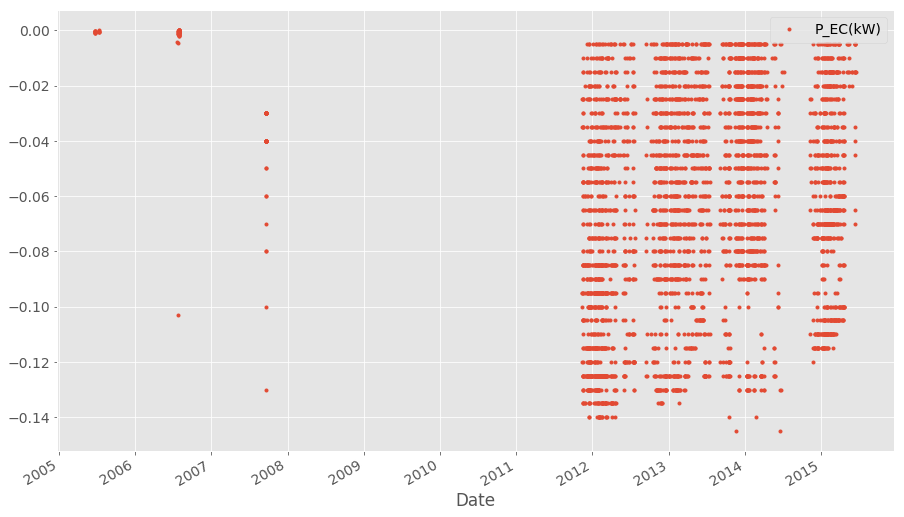

In [41]:
df[df['P_EC(kW)'] < 0].plot(y='P_EC(kW)', linestyle="None", marker='.')

The negative power measurements may be a calibration issue, and are generally only occurring after the new heat pump was installed. There are some erroneous borehole temperature measurements in the data "described" above, but those arn't so important at this point.

Negative power and mass flow rates do not appear to be correlated as seen in the following plot. Probably OK to set them to 0 at this point.

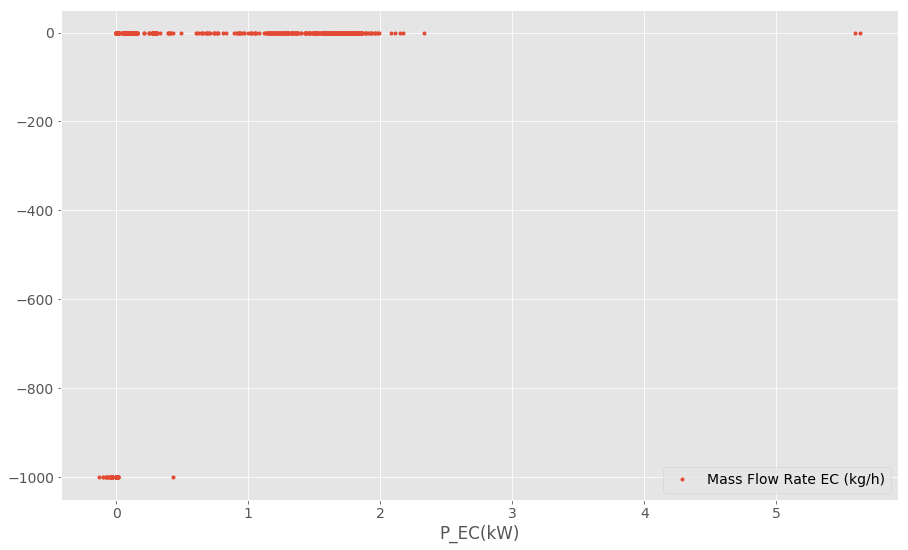

In [42]:
df[df['Mass Flow Rate EC (kg/h)'] < 0].plot(x='P_EC(kW)', y='Mass Flow Rate EC (kg/h)', linestyle="None", marker='.')

Same investigation for the internal circuit.

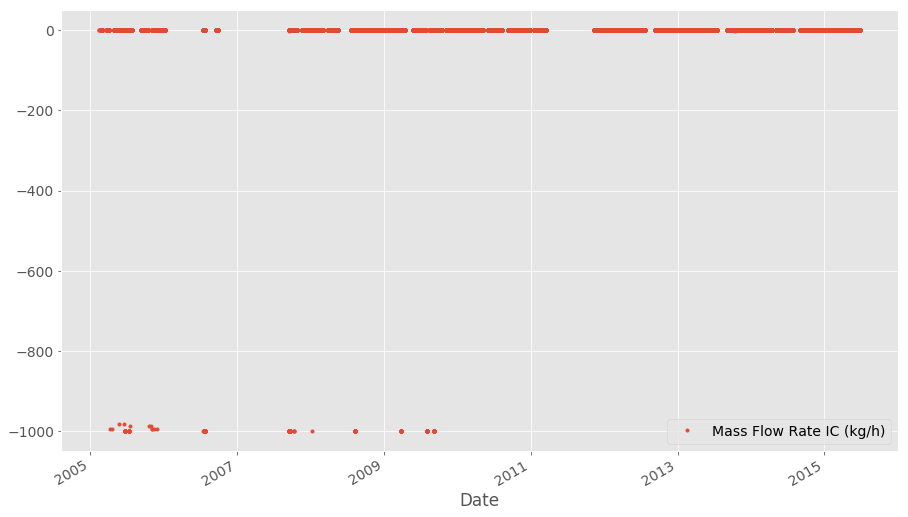

In [43]:
df[df['Mass Flow Rate IC (kg/h)'] < 0].plot(y='Mass Flow Rate IC (kg/h)', linestyle="None", marker='.')

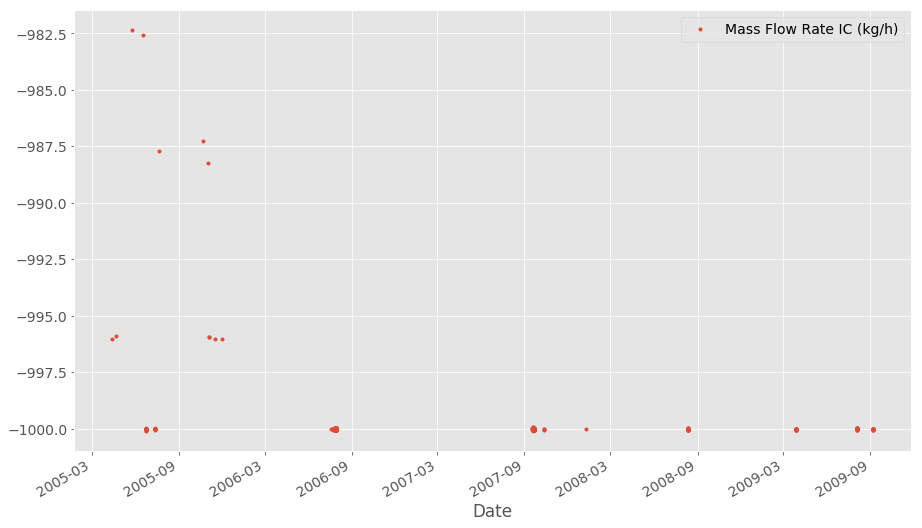

In [44]:
df[df['Mass Flow Rate IC (kg/h)'] < -200].plot(y='Mass Flow Rate IC (kg/h)', linestyle="None", marker='.')

In [45]:
df[df['Mass Flow Rate IC (kg/h)'] < -200].describe()

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),B6_1 (C),B6_2 (C),B6_3 (C),B6_4 (C),B6_5 (C),B6_6 (C),B6_7 (C),B6in (C),B6out (C),Mass Flow Rate EC (kg/h),Mass Flow Rate IC (kg/h),P_EC(kW),P_ECP(kW),P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C)
count,9.220000e+02,922.000000,922.000000,922.000000,9.220000e+02,9.220000e+02,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,9.220000e+02,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,0.0,922.000000,0.0,922.000000,922.000000,922.000000,922.000000,0.0
mean,9.132494e+37,29.989242,30.145327,28.955946,7.078814e+37,6.947891e+37,29.976715,29.400818,30.792508,30.451856,23.708586,21.773476,19.962993,1.159653e+37,22.977454,22.494043,22.295920,28.885543,28.265534,-970.535271,-999.913660,0.004635,NaN,0.002362,NaN,24.266693,17.492507,23.739132,19.915512,NaN
std,3.115092e+37,4.239681,3.203933,3.358471,4.761570e+37,4.673505e+37,3.292111,3.932071,3.516387,4.500237,1.436824,1.245589,0.632064,3.218635e+37,0.988773,1.273603,0.898575,2.384598,3.105378,305.986628,1.121691,0.198750,NaN,0.069789,NaN,1.698326,5.303886,1.034096,4.561840,NaN
min,1.394000e+01,16.192000,13.890000,17.200000,1.456000e+01,1.614400e+01,14.120000,16.730000,14.110000,16.330000,15.720000,17.910000,17.010000,-9.900000e+37,17.670000,17.090000,18.470000,14.070000,16.410000,-1000.102950,-1000.090000,-0.130000,NaN,-0.080000,NaN,15.819000,7.470000,17.081000,10.438000,NaN
25%,1.019205e+38,25.454992,28.281526,25.670000,2.858750e+01,2.562000e+01,27.910433,25.890000,28.546069,25.742750,23.368250,20.994250,19.638250,2.119000e+01,22.567000,21.668000,21.860000,28.552500,25.132500,-1000.030875,-1000.030875,-0.000307,NaN,-0.000353,NaN,23.144250,13.898500,23.542000,17.451000,NaN
50%,1.019205e+38,30.611054,30.098789,29.161417,1.027818e+38,1.008810e+38,29.461103,29.018110,31.034007,31.058340,23.658500,21.590000,19.815000,2.169300e+01,23.040000,22.246500,22.367500,29.574666,29.444926,-1000.015450,-1000.020000,0.000476,NaN,0.000000,NaN,24.092500,17.780000,23.780000,20.106000,NaN
75%,1.019205e+38,33.835741,32.619577,31.892640,1.027818e+38,1.008810e+38,32.439188,32.728510,33.622576,34.510881,24.320000,22.370000,20.269000,2.381950e+01,23.640000,23.430000,22.829750,30.247419,30.889757,-1000.000000,-1000.005150,0.000609,NaN,0.000019,NaN,25.047500,20.349000,24.270000,21.788250,NaN
max,1.020000e+38,35.348134,34.175424,33.356650,1.030000e+38,1.010000e+38,34.486814,35.442417,35.242759,36.426148,26.460000,25.467000,21.522000,9.900000e+37,24.510000,25.304000,24.030000,31.615515,31.458061,2777.908500,-982.353900,4.970088,NaN,1.021178,NaN,30.240000,50.783000,26.034000,46.583000,NaN


Lots of overlap with the previous EC data it appears.

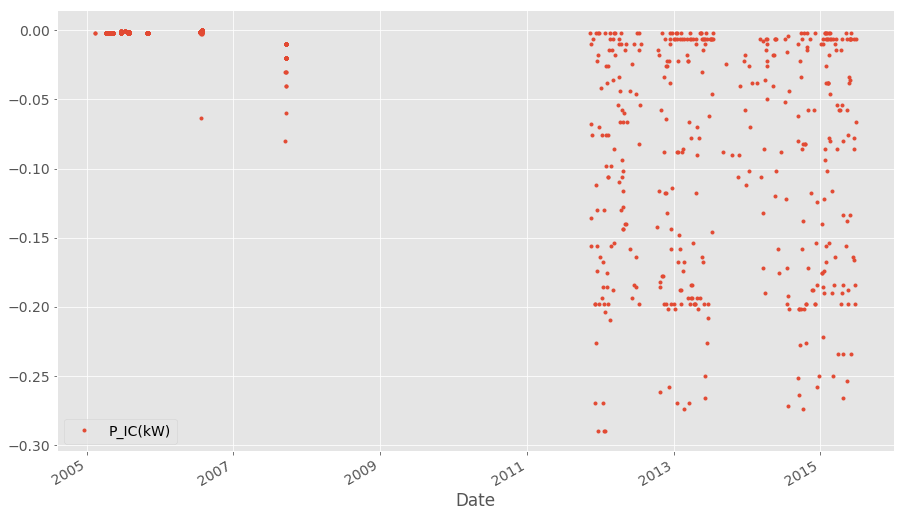

In [46]:
df[df['P_IC(kW)'] < 0].plot(y='P_IC(kW)', linestyle="None", marker='.')

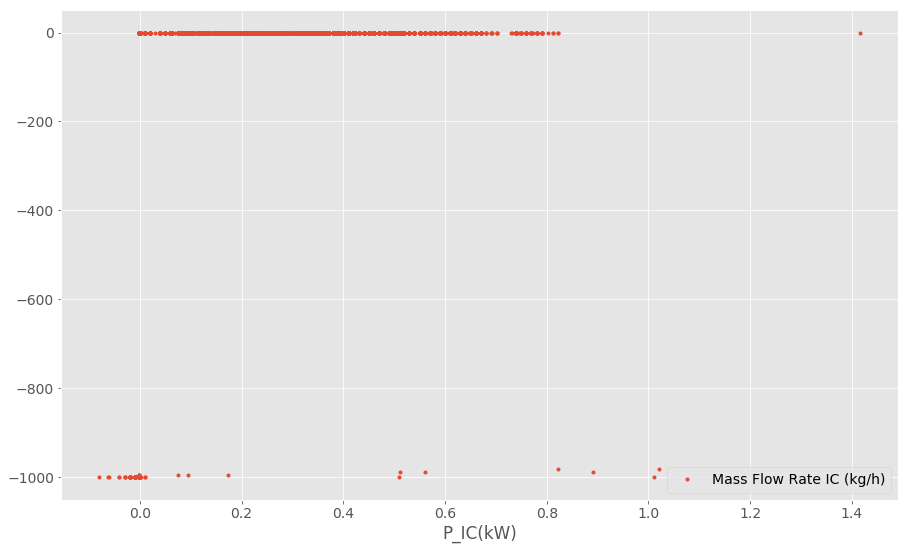

In [47]:
df[df['Mass Flow Rate IC (kg/h)'] < 0].plot(x='P_IC(kW)', y='Mass Flow Rate IC (kg/h)', linestyle="None", marker='.')

Again, the negative power measurements are occuring after the new heat pump was installed.

It looks like the negative mass flow and power measurements are not correlated as before. In this case, though, the internal circuit power measurements include the FCU's so it would be possible to have significant power draw and no mass flow rate.

In [48]:
# These values are going to be reset to 0 here. Expecting a value set on slice warning.

df['Mass Flow Rate IC (kg/h)'][df['Mass Flow Rate IC (kg/h)'] < 0] = 0
df['Mass Flow Rate EC (kg/h)'][df['Mass Flow Rate EC (kg/h)'] < 0] = 0
df['P_IC(kW)'][df['P_IC(kW)'] < 0] = 0
df['P_EC(kW)'][df['P_EC(kW)'] < 0] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\l

In [49]:
# Verify that the values have been reset

df[df['P_IC(kW)'] < 0]

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),B6_1 (C),B6_2 (C),B6_3 (C),B6_4 (C),B6_5 (C),B6_6 (C),B6_7 (C),B6in (C),B6out (C),Mass Flow Rate EC (kg/h),Mass Flow Rate IC (kg/h),P_EC(kW),P_ECP(kW),P_IC(kW),P_ICP(kW),Representative Data,STD/OPT,Sys Working,TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [50]:
# Check the data set for strange data

df.describe()

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),B6_1 (C),B6_2 (C),B6_3 (C),B6_4 (C),B6_5 (C),B6_6 (C),B6_7 (C),B6in (C),B6out (C),Mass Flow Rate EC (kg/h),Mass Flow Rate IC (kg/h),P_EC(kW),P_ECP(kW),P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C)
count,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371437e+06,3.371437e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.370514e+06,2.286073e+06,3.370514e+06,2.286073e+06,3.371450e+06,3.371450e+06,3.371450e+06,3.371450e+06,2.287009e+06
mean,8.730137e+35,2.102891e+01,2.055495e+32,2.089286e+01,3.576250e+35,3.895135e+35,2.047460e+01,2.077826e+01,6.288706e+33,2.088039e+01,5.285560e+32,5.579202e+32,2.642780e+32,5.275749e+37,1.323871e+37,2.995150e+33,3.817349e+32,2.044975e+01,2.090533e+01,6.980936e+02,1.681618e+03,6.449835e-01,4.022978e-02,4.081685e-01,1.569753e-01,2.120571e+01,2.740010e+01,2.089564e+01,2.679339e+01,2.589700e+01
std,9.402108e+36,3.603519e+00,1.944009e+35,3.492153e+00,6.052958e+36,6.256799e+36,5.531656e+00,3.719114e+00,8.064163e+35,3.393261e+00,2.853022e+35,3.001974e+35,2.088200e+35,4.955383e+37,3.369610e+37,5.906251e+35,2.470791e+35,5.286657e+00,3.619844e+00,1.146630e+03,1.476494e+03,1.215099e+00,7.439340e-02,3.471317e-01,1.701126e-01,4.568143e+00,1.292984e+01,2.847468e+00,1.170340e+01,1.244439e+01
min,-1.020000e+38,-9.189000e+01,-9.900000e+37,-8.035000e+01,-1.606600e+02,-2.037600e+02,4.628992e-04,-1.842035e-03,-1.024254e+38,1.415000e+01,-9.900000e+37,-9.900000e+37,-9.900000e+37,-9.900000e+37,-9.900000e+37,-9.900000e+37,-9.900000e+37,-1.750500e+02,-1.816900e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.190000e+01,2.840000e+00,1.139000e+01,5.460000e+00,4.800000e+00
25%,1.629000e+01,1.833000e+01,1.651000e+01,1.815000e+01,1.633000e+01,1.775000e+01,1.635000e+01,1.826000e+01,1.636000e+01,1.828000e+01,1.677825e+01,1.857200e+01,1.772000e+01,5.776300e+02,1.851000e+01,1.773000e+01,1.882000e+01,1.613000e+01,1.798000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1.807000e+01,1.533100e+01,1.870000e+01,1.622000e+01,1.335000e+01
50%,1.826000e+01,1.983000e+01,1.845000e+01,1.940000e+01,1.825000e+01,1.929000e+01,1.820000e+01,1.952000e+01,1.808000e+01,1.944000e+01,1.809000e+01,1.957000e+01,1.840000e+01,9.900000e+37,1.979000e+01,1.925000e+01,1.940000e+01,1.854000e+01,1.967000e+01,3.862500e-02,1.792260e+03,7.000000e-02,0.000000e+00,3.820000e-01,5.400000e-02,2.048000e+01,2.984000e+01,2.022000e+01,2.686000e+01,2.841000e+01
75%,2.589000e+01,2.353000e+01,2.589000e+01,2.376800e+01,2.564400e+01,2.366000e+01,2.565000e+01,2.368000e+01,2.594000e+01,2.368000e+01,2.256000e+01,2.119000e+01,1.959200e+01,9.900000e+37,2.304000e+01,2.238000e+01,2.111000e+01,2.531000e+01,2.368000e+01,2.082170e+03,3.185530e+03,4.152817e-01,0.000000e+00,6.500000e-01,3.660000e-01,2.468000e+01,3.896000e+01,2.324000e+01,3.772000e+01,3.802000e+01
max,1.020000e+38,5.081000e+01,9.900000e+37,5.110000e+01,1.030000e+38,1.010000e+38,3.527000e+01,3.618243e+01,1.024254e+38,3.935209e+01,9.900000e+37,9.900000e+37,9.900000e+37,9.900000e+37,9.900000e+37,9.900000e+37,9.900000e+37,5.030000e+01,4.929000e+01,3.313380e+03,4.438606e+03,6.280000e+00,2.500000e-01,2.200000e+00,4.800000e-01,5.004000e+01,5.751000e+01,5.054000e+01,5.391000e+01,5.533000e+01


It looks like there are some strange readings on associated with the borehole temperatures, but the IC and EC inlet/outlet temps, and power readings look OK at this point. We may need to investigate that further later

# Investigate heat pump cycling at short timesteps

Here we will look at what the heat pump and pumping staging strategy is.

First, the entire data set is plotted.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


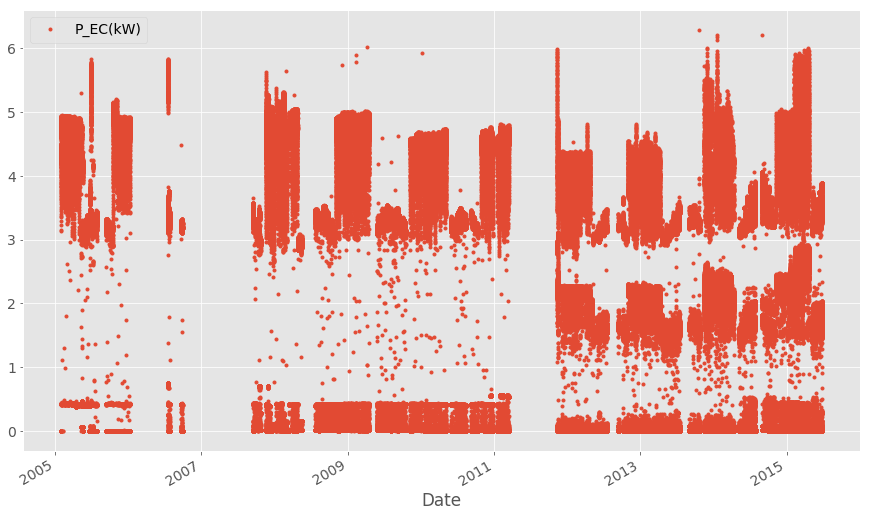

In [51]:
df.plot(y=['P_EC(kW)'], linestyle="None", marker='.')

We then filter down to a single year.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


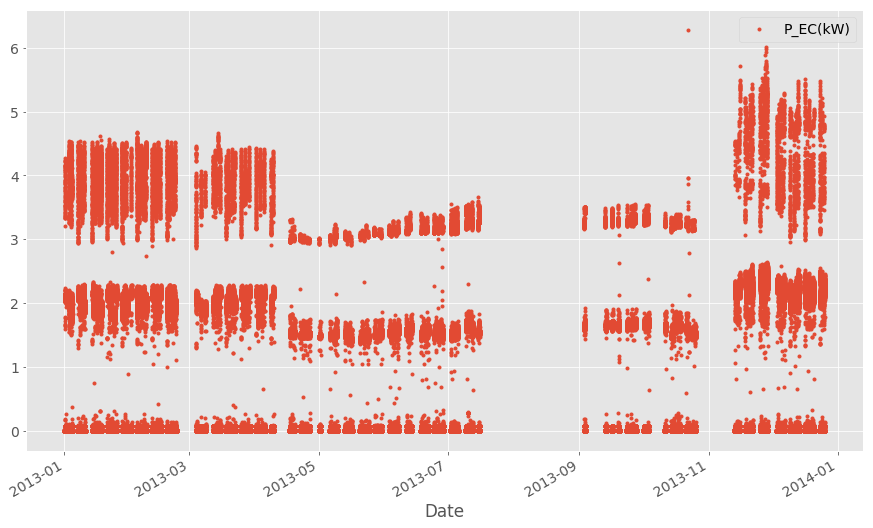

In [52]:
df.loc['2013'].plot(y=['P_EC(kW)'], linestyle="None", marker='.')

Again, filter down to a single summer month.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


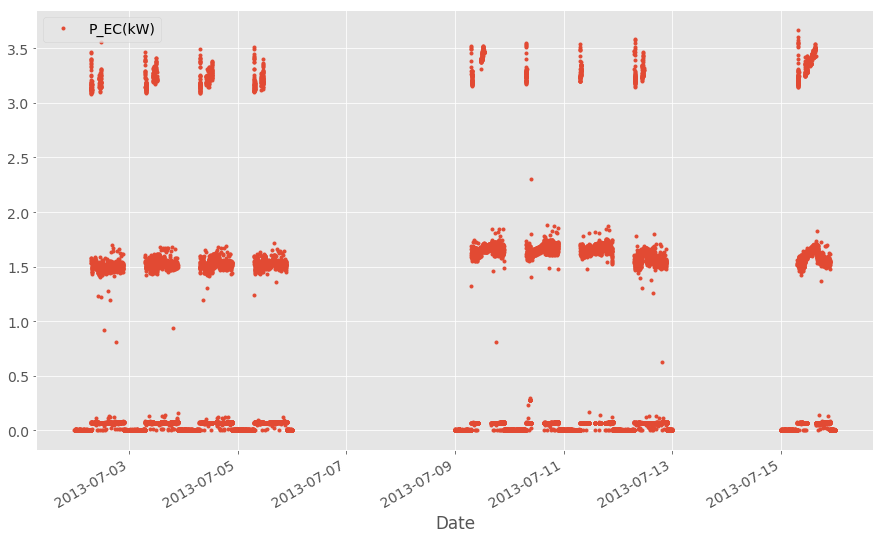

In [53]:
df.loc['2013-07'].plot(y=['P_EC(kW)'], linestyle="None", marker='.')

And then to a single summer day.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


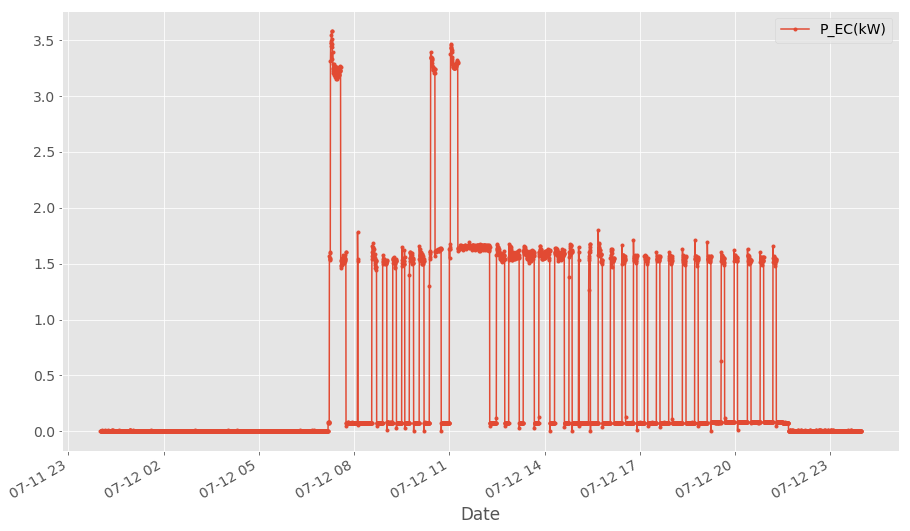

In [54]:
df.loc['2013-07-12'].plot(y=['P_EC(kW)'], marker='.')

Then, finally to a few minutes in the afternoon.

External and internal circuits power rates are plotted. The following is a summary of the entries:

-   "P_EC" is the power draw of the heat pump and external, ground loop circulating pump
-   "P_ECP" is the power draw of the circulating pump, only
-   "P_IC is the power draw of the fan coil units and the internal circulating pump
-   "P_ICP" is the power draw of the internal circulating pump

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


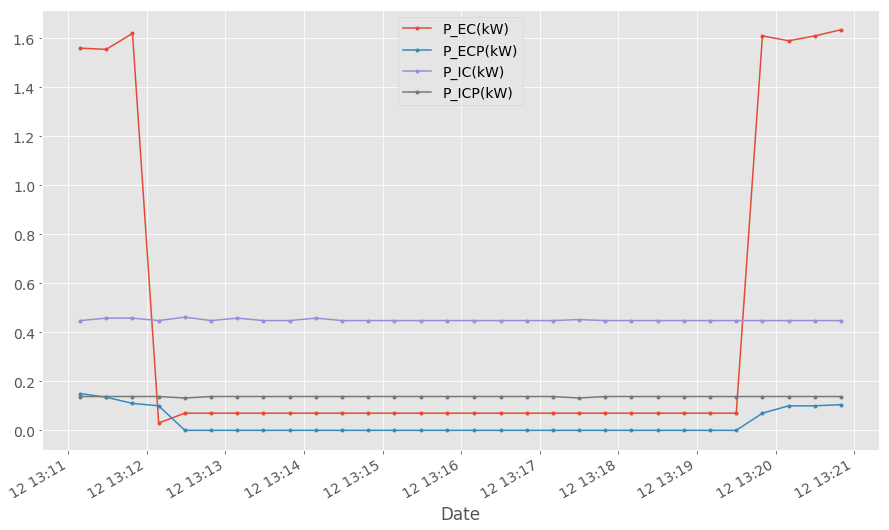

In [55]:
df.loc['2013-07-12 13:11:00':'2013-07-12 13:21:00'].plot(y=['P_EC(kW)', 'P_ECP(kW)', 'P_IC(kW)', 'P_ICP(kW)'], marker='.')

Now we look at some morning hours

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


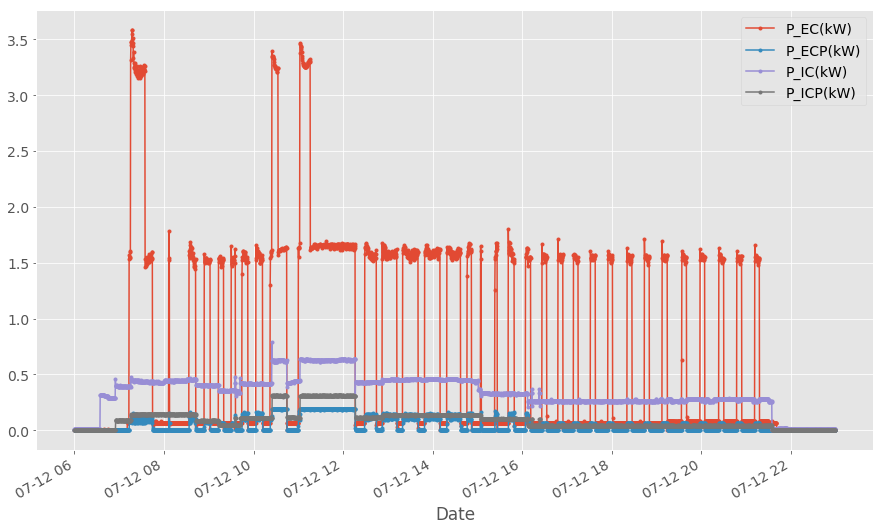

In [56]:
df.loc['2013-07-12 06':'2013-07-12 22'].plot(y=['P_EC(kW)', 'P_ECP(kW)', 'P_IC(kW)', 'P_ICP(kW)'], marker='.')

Narrowing down further, it looks like the FCU and ICP are on constantly during daytime hours, but off before about 6:30 AM.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


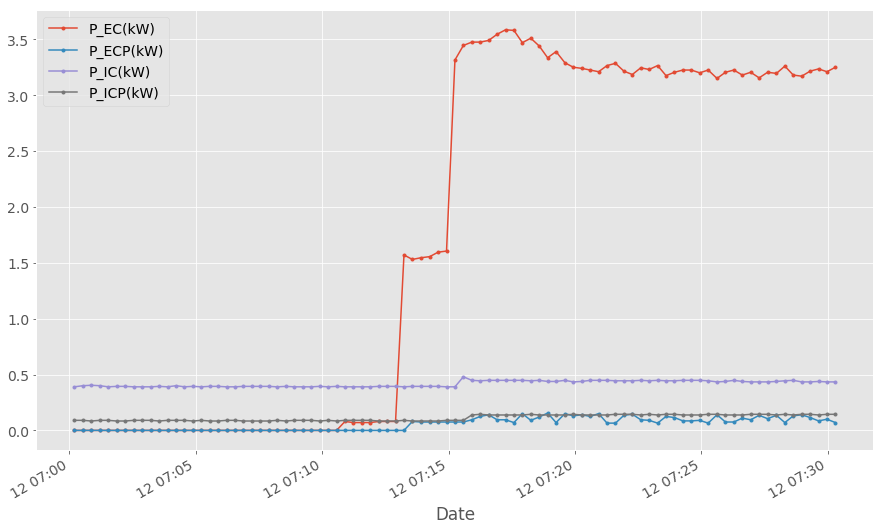

In [57]:
df.loc['2013-07-12 07:00:00':'2013-07-12 07:30:30'].plot(y=['P_EC(kW)', 'P_ECP(kW)', 'P_IC(kW)', 'P_ICP(kW)'], marker='.')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


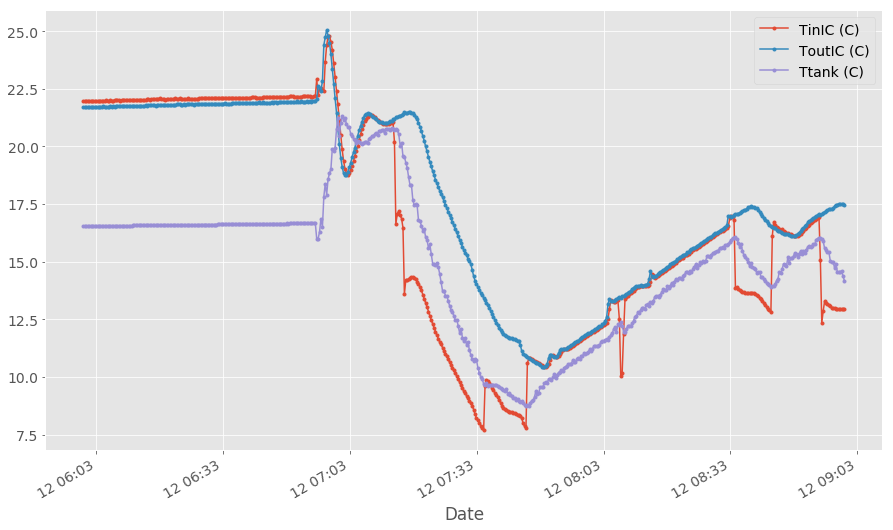

In [58]:
df.loc['2013-07-12 06':'2013-07-12 08'].plot(y=['TinIC (C)', 'ToutIC (C)', 'Ttank (C)'], marker='.')

## Aggregate the data

Aggregate the data from 20 second intervals to smooth out some of the short-term transient effects.

In [59]:
df_agg_minutes = df.resample('5T').mean()

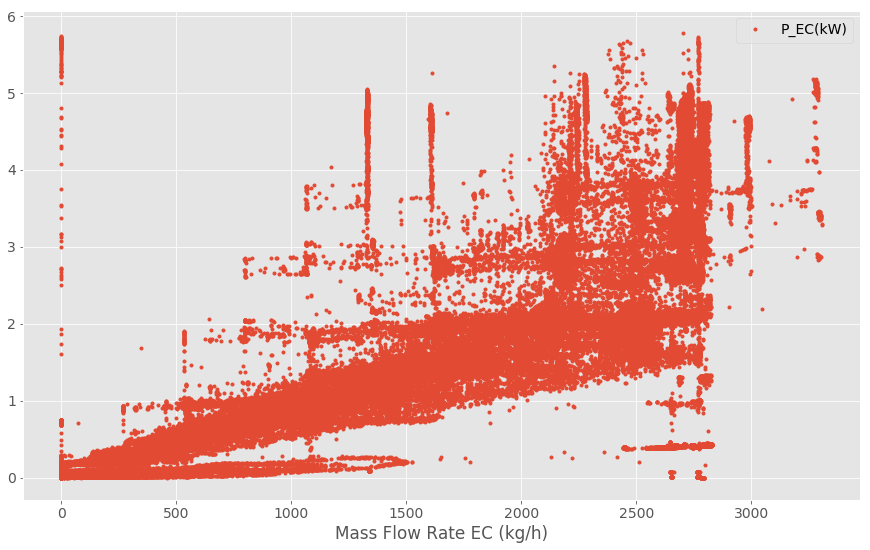

In [60]:
df_agg_minutes.plot(x='Mass Flow Rate EC (kg/h)', y='P_EC(kW)', marker='.', linestyle="None")

There are some points near 0 mass flow rate on the ground loop, even after aggregateing into 5 minute blocks, where we have full heat pump power and very low flow.

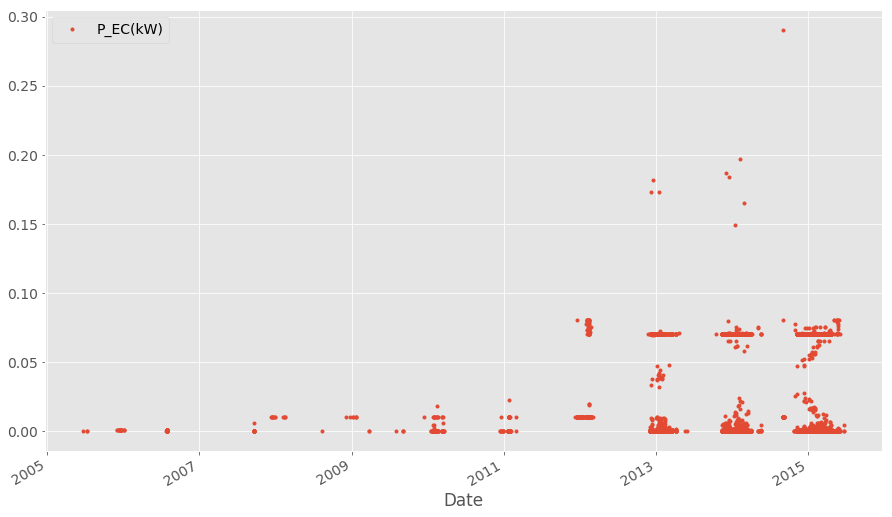

In [61]:
df_agg_minutes[df_agg_minutes['Mass Flow Rate EC (kg/h)'] == 0].plot(y='P_EC(kW)', marker='.', linestyle='None')

This looks OK, at least. Zero mass flow indicates 0 heat pump power.

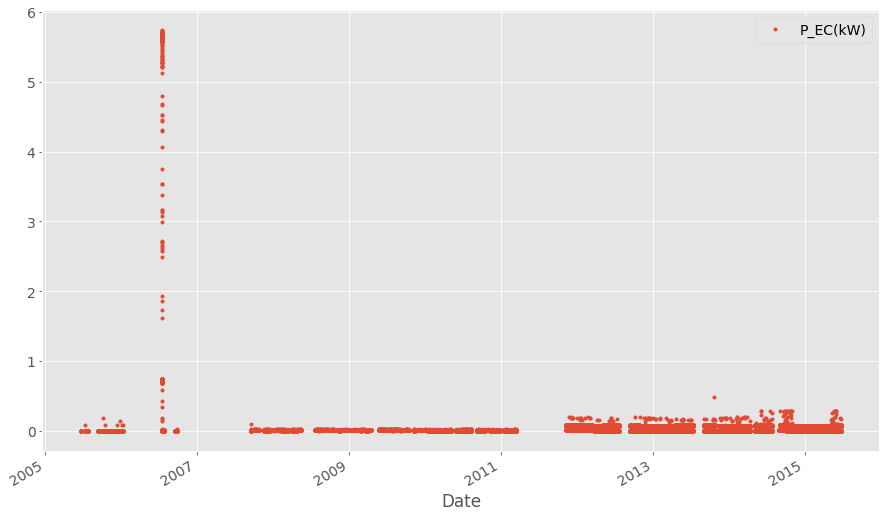

In [62]:
df_agg_minutes[df_agg_minutes['Mass Flow Rate EC (kg/h)'] < 10].plot(y='P_EC(kW)', marker='.', linestyle='None')

"Well, there's yer problem!" Looks like there is something wierd going on in 2006.

Narrowing down a little...

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


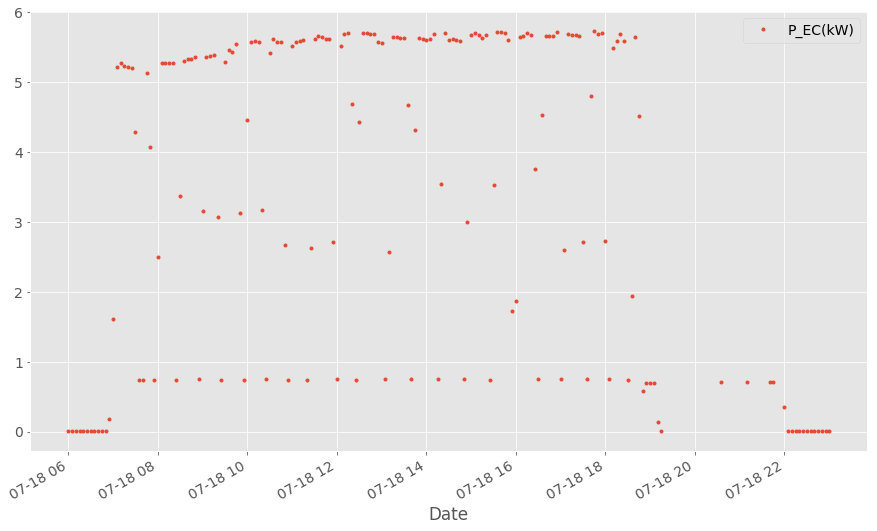

In [63]:
df_agg_minutes.loc['2006-07-18 06:00:00':'2006-07-18 23:00:00'][df_agg_minutes['Mass Flow Rate EC (kg/h)'] < 10].plot(y='P_EC(kW)', marker='.', linestyle='None')

I'm wondering if this is when they were testing their ASHP system and this point just didn't get marked "OFF". I'm not sure if this would have been measured using the same power meter.

I think I'll drop these points.

In [64]:
df_agg_minutes.drop(df_agg_minutes.loc['2006-07-18 06:00:00':'2006-07-18 23:00:00'].index, inplace=True)

And, confirmed. The points are gone.

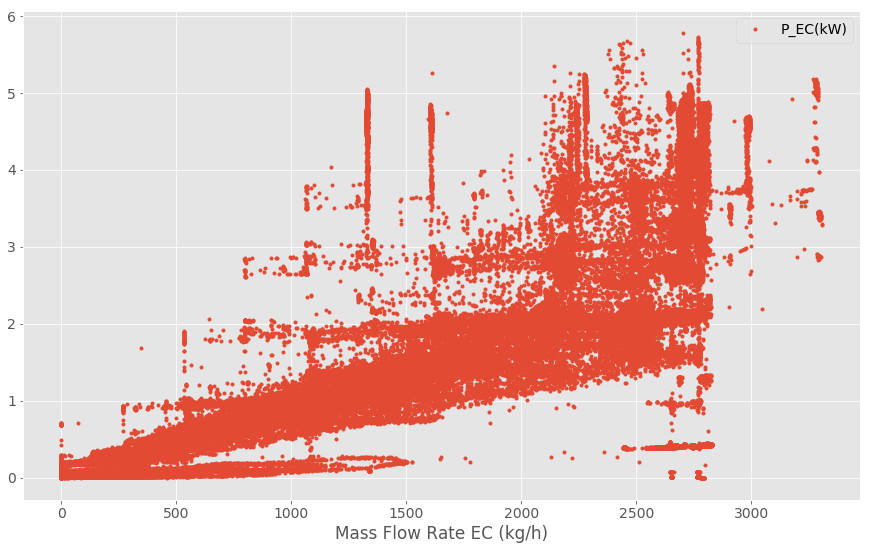

In [65]:
df_agg_minutes.plot(x='Mass Flow Rate EC (kg/h)', y='P_EC(kW)', marker='.', linestyle="None")

Now look at summer vs. winter pumping.

In [66]:
x1 = df_agg_minutes.loc['2013-07']['Mass Flow Rate EC (kg/h)'].as_matrix()
y1 = df_agg_minutes.loc['2013-07']['P_ECP(kW)'].as_matrix()

x2 = df_agg_minutes.loc['2013-01']['Mass Flow Rate EC (kg/h)'].as_matrix()
y2 = df_agg_minutes.loc['2013-01']['P_ECP(kW)'].as_matrix()

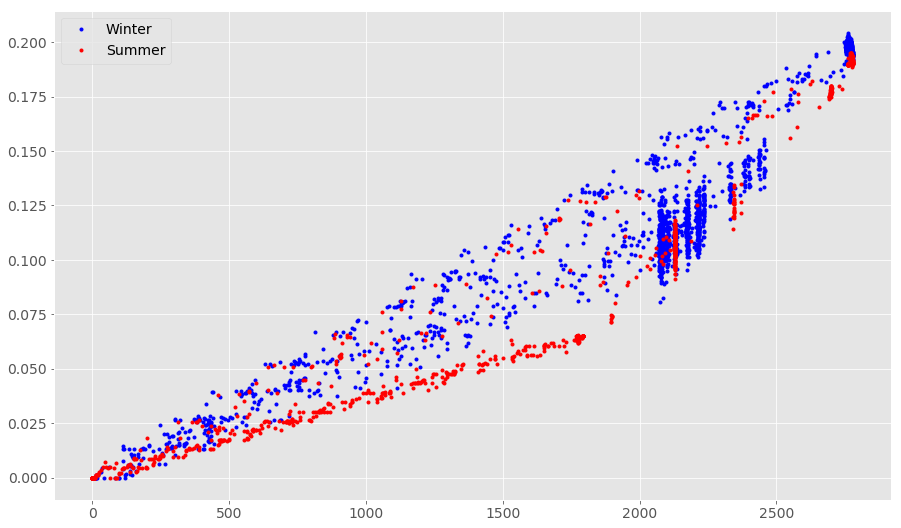

In [67]:
plt.plot(x2, y2, marker='.', linestyle='None', color ='b', label='Winter')
plt.plot(x1, y1, marker='.', linestyle='None', color ='r', label='Summer')

plt.legend()
plt.show()

Slightly higher pumping power in winter. This makes sense due to fluid viscosity.

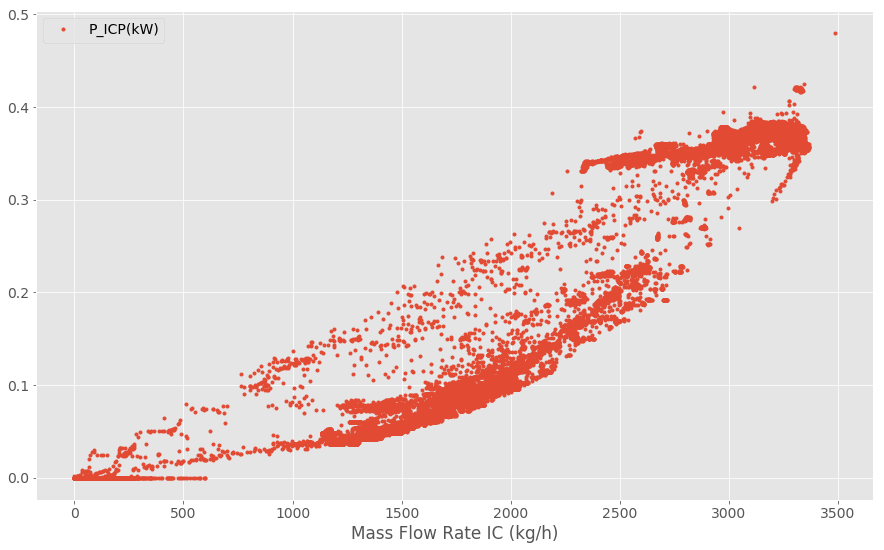

In [68]:
df_agg_minutes.plot(x='Mass Flow Rate IC (kg/h)', y='P_ICP(kW)', marker='.', linestyle="None")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


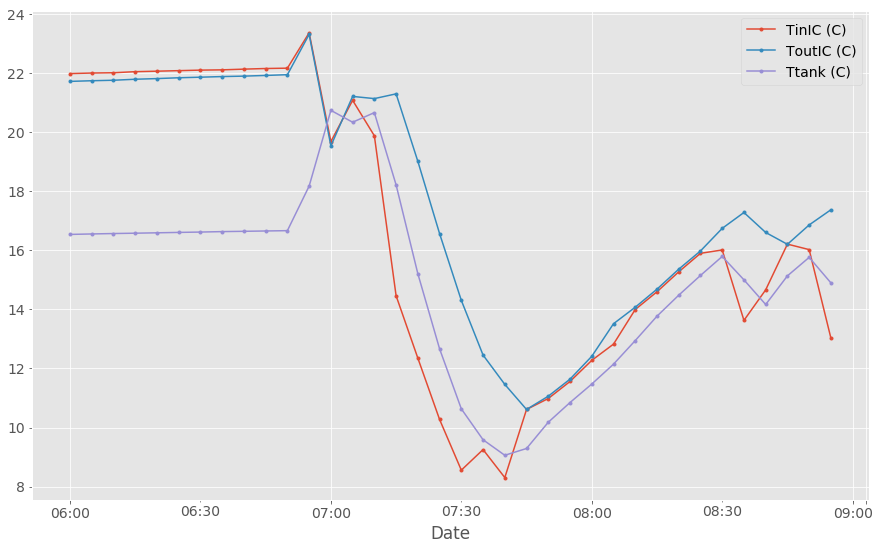

In [69]:
df_agg_minutes.loc['2013-07-12 06':'2013-07-12 08'].plot(y=['TinIC (C)', 'ToutIC (C)', 'Ttank (C)'], marker='.')

# Monthly COP Plots

In [70]:
def get_cp(temp):
    temp_in_k = temp + 273.15
    return PropsSI('C', 'T', temp_in_k, 'P', 101325, 'Water') / 1000

In [71]:
df_agg_minutes['IC Mean Temp (C)'] = (df_agg_minutes['TinIC (C)'] + df_agg_minutes['ToutIC (C)']) / 2

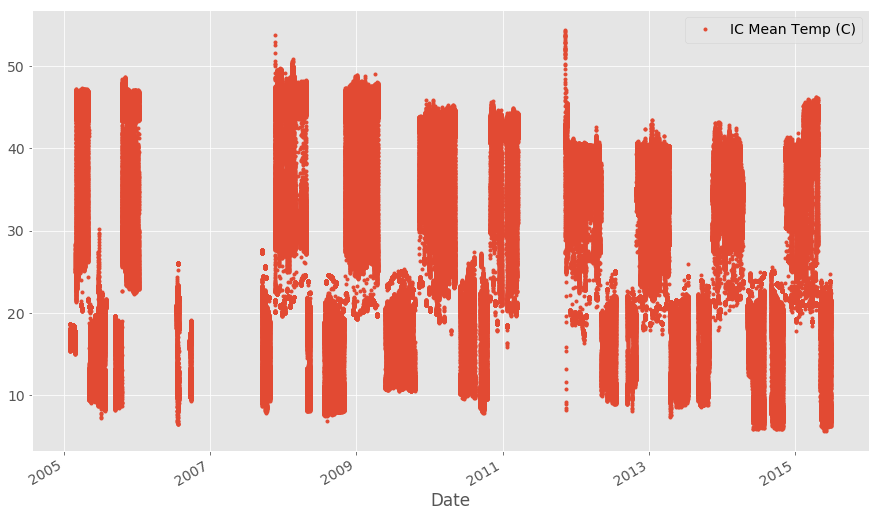

In [72]:
df_agg_minutes.plot(y='IC Mean Temp (C)', marker='.', linestyle="None")

In [73]:
df_agg_minutes = df_agg_minutes.resample('60T').mean()

In [74]:
df_agg_minutes = df_agg_minutes[df_agg_minutes['IC Mean Temp (C)'].notnull()]

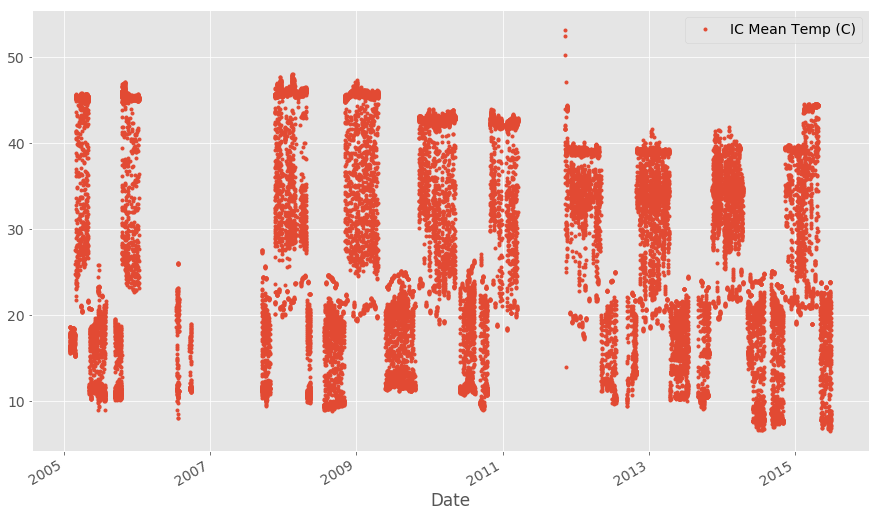

In [75]:
df_agg_minutes.plot(y='IC Mean Temp (C)', marker='.', linestyle="None")

In [76]:
df_agg_minutes['cp (kJ/kg-K)'] = df_agg_minutes['IC Mean Temp (C)'].apply(get_cp)

In [77]:
mask_heating = (df_agg_minutes['ToutIC (C)'] - df_agg_minutes['TinIC (C)']) < 0
df_heating = df_agg_minutes[mask_heating].copy()

In [78]:
mask_cooling = (df_agg_minutes['ToutIC (C)'] - df_agg_minutes['TinIC (C)']) > 0
df_cooling = df_agg_minutes[mask_cooling].copy()

In [79]:
df_heating['Heating Delivered (kW)'] = df_heating['Mass Flow Rate IC (kg/h)'] * df_heating['cp (kJ/kg-K)'] * (df_heating['TinIC (C)'] - df_heating['ToutIC (C)']) / 3600

In [80]:
df_cooling['Cooling Delivered (kW)'] = df_cooling['Mass Flow Rate IC (kg/h)'] * df_cooling['cp (kJ/kg-K)'] * (df_cooling['ToutIC (C)'] - df_cooling['TinIC (C)']) / 3600

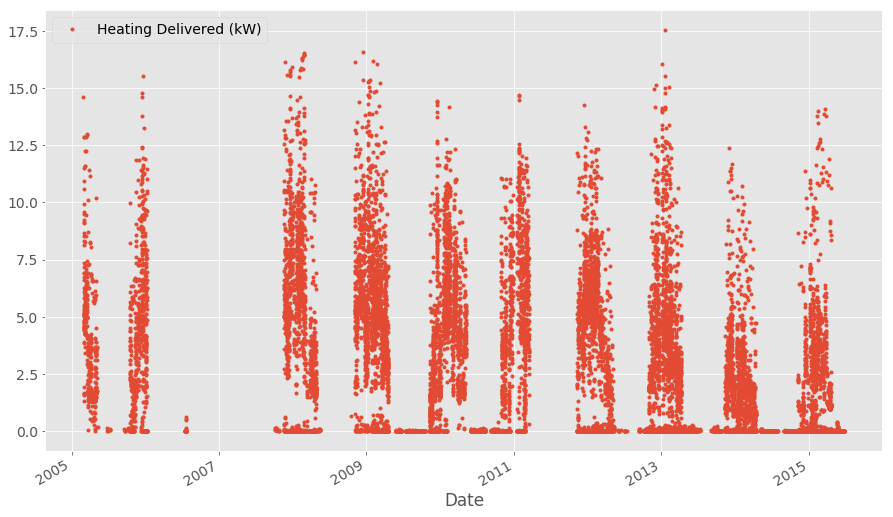

In [81]:
df_heating.plot(y='Heating Delivered (kW)', linestyle="None", marker='.')

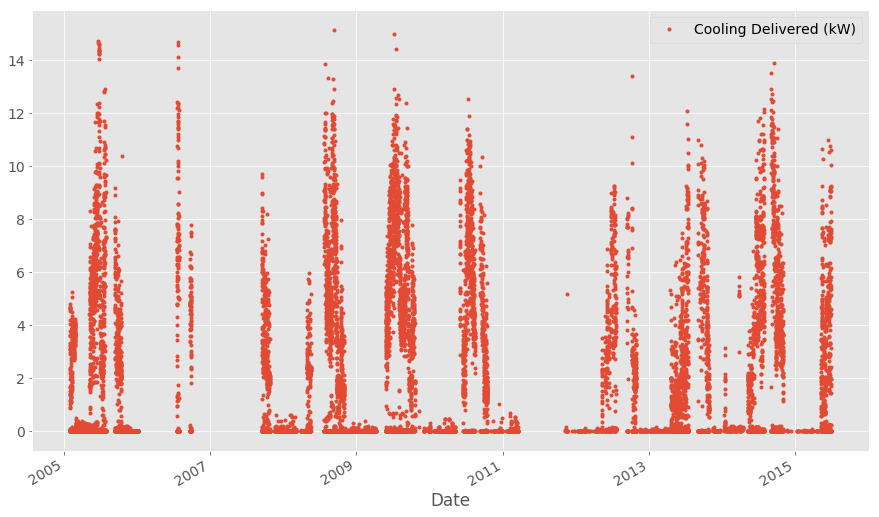

In [82]:
df_cooling.plot(y='Cooling Delivered (kW)', linestyle="None", marker='.')

In [83]:
df_heating = df_heating.resample('M').mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


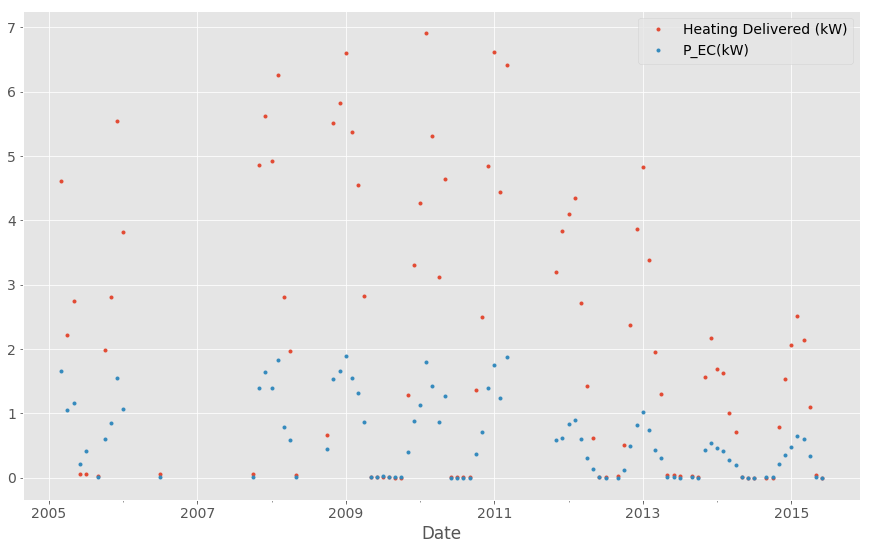

In [84]:
df_heating.plot(y=['Heating Delivered (kW)', 'P_EC(kW)'], marker='.', linestyle="None")

In [85]:
df_cooling = df_cooling.resample('M').mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


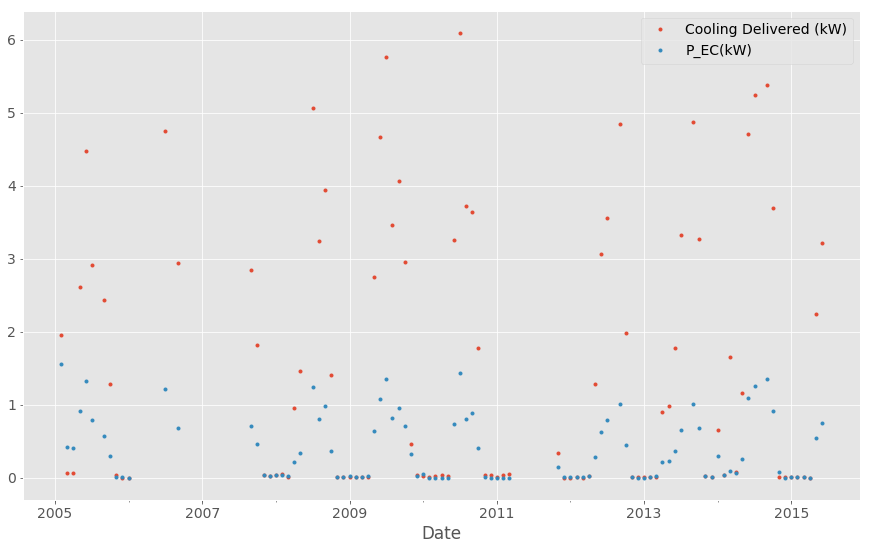

In [86]:
df_cooling.plot(y=['Cooling Delivered (kW)', 'P_EC(kW)'], marker='.', linestyle="None")

In [87]:
COP_2_mask_index_heating = df_heating[df_heating['P_EC(kW)'] < 0.1].index
df_heating.drop(COP_2_mask_index_heating, inplace=True)

COP_2_mask_index_cooling = df_cooling[df_cooling['P_EC(kW)'] < 0.1].index
df_cooling.drop(COP_2_mask_index_cooling, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


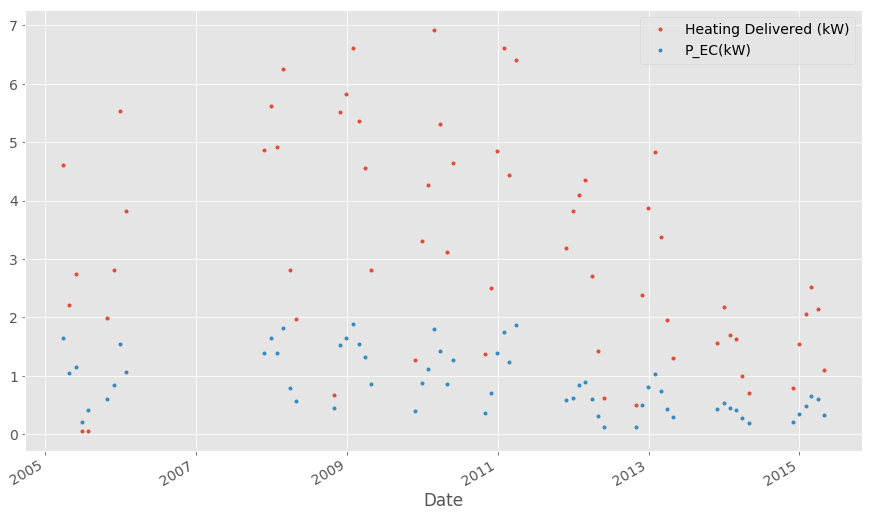

In [88]:
df_heating.plot(y=['Heating Delivered (kW)', 'P_EC(kW)'], marker='.', linestyle="None")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


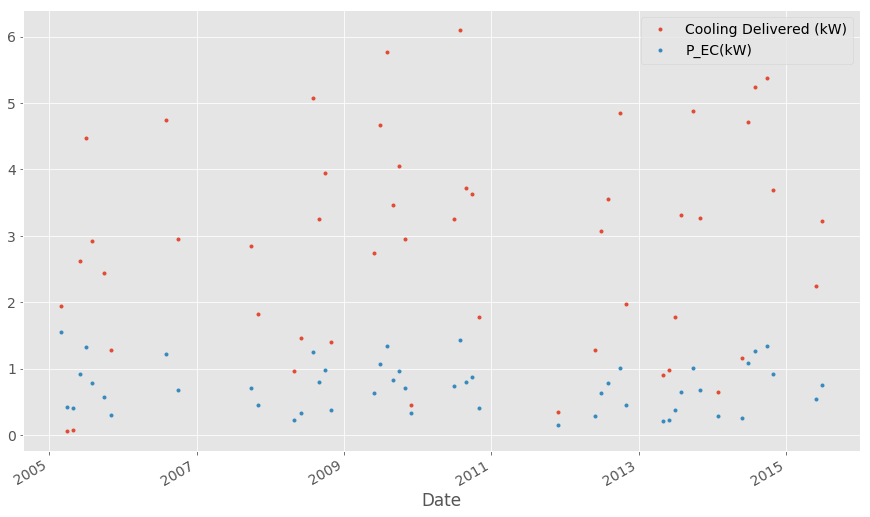

In [89]:
df_cooling.plot(y=['Cooling Delivered (kW)', 'P_EC(kW)'], marker='.', linestyle="None")

In [90]:
df_heating['COP 1'] = df_heating['Heating Delivered (kW)'] / (df_heating['P_EC(kW)'] - df_heating['P_ECP(kW)'])
df_heating['COP 2'] = df_heating['Heating Delivered (kW)'] / df_heating['P_EC(kW)']
df_heating['COP 4'] = df_heating['Heating Delivered (kW)'] / (df_heating['P_EC(kW)'] + df_heating['P_IC(kW)'])

df_cooling['COP 1'] = df_cooling['Cooling Delivered (kW)'] / (df_cooling['P_EC(kW)'] - df_cooling['P_ECP(kW)'])
df_cooling['COP 2'] = df_cooling['Cooling Delivered (kW)'] / df_cooling['P_EC(kW)']
df_cooling['COP 4'] = df_cooling['Cooling Delivered (kW)'] / (df_cooling['P_EC(kW)'] + df_cooling['P_IC(kW)'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


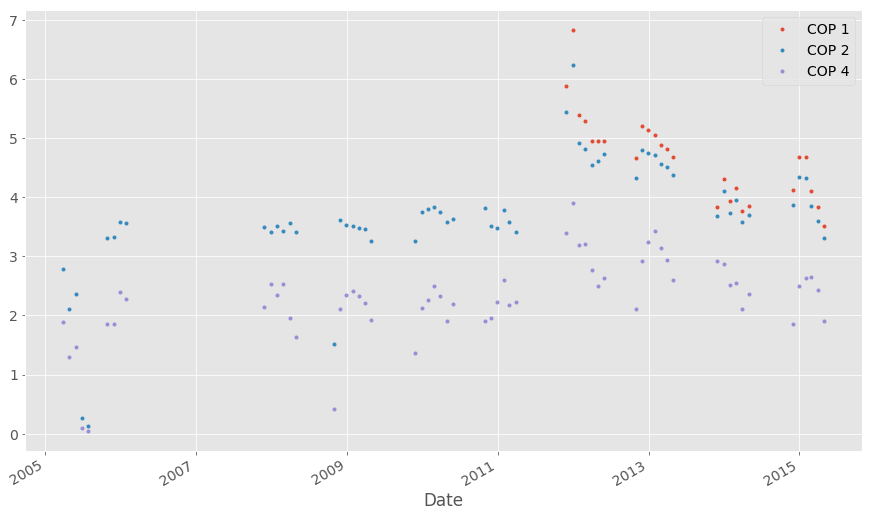

In [91]:
df_heating.plot(y=['COP 1', 'COP 2', 'COP 4'], linestyle='None', marker='.')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


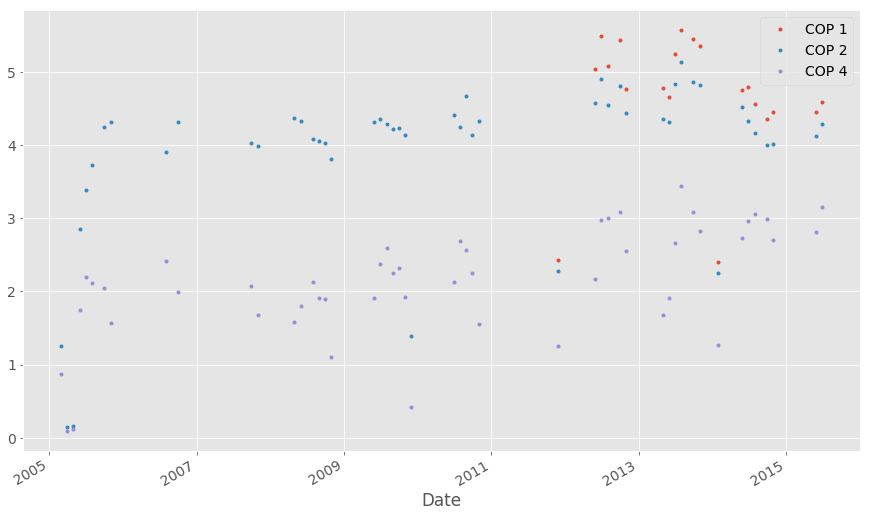

In [92]:
df_cooling.plot(y=['COP 1', 'COP 2', 'COP 4'], linestyle='None', marker='.')

In [93]:
df_heating[['COP 1', 'COP 2', 'COP 4']].describe()

,COP 1,COP 2,COP 4
count,26.000000,61.000000,61.000000
mean,4.672227,3.693645,2.281446
std,0.741302,0.979746,0.697938
min,3.507427,0.132933,0.045755
25%,4.110520,3.466029,1.952559
50%,4.682985,3.610260,2.335778
75%,5.030964,4.323551,2.607230
max,6.825077,6.246431,3.906182


In [94]:
df_cooling[['COP 1', 'COP 2', 'COP 4']].describe()

,COP 1,COP 2,COP 4
count,20.000000,50.000000,50.000000
mean,4.681388,3.904808,2.132628
std,0.862153,1.101378,0.762026
min,2.406234,0.143040,0.093161
25%,4.534511,4.006860,1.762060
50%,4.771321,4.251225,2.154747
75%,5.266972,4.361222,2.694511
max,5.565093,5.129014,3.438001


In [95]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='mmatts', api_key='EDvSA2kurNTEkuLP0FDL')

In [96]:
data_cop_1_heating = go.Bar(x=df_heating.index, y=df_heating['COP 1'], name="Heating", marker=dict(color='rgb(254, 0, 0)'))
data_cop_1_cooling = go.Bar(x=df_cooling.index, y=df_cooling['COP 1'], name="Cooling", marker=dict(color='rgb(0, 0, 254)'))
data_cop_1 = [data_cop_1_heating, data_cop_1_cooling]
layout_cop_1 = go.Layout(barmode='group', title='COP 1', xaxis=dict(title="Date"), yaxis=dict(title="COP 1"))

In [97]:
fig_cop_1 = go.Figure(data=data_cop_1, layout=layout_cop_1)
py.iplot(fig_cop_1)

In [98]:
data_cop_2_heating = go.Bar(x=df_heating.index, y=df_heating['COP 2'], name="Heating", marker=dict(color='rgb(254, 0, 0)'))
data_cop_2_cooling = go.Bar(x=df_cooling.index, y=df_cooling['COP 2'], name="Cooling", marker=dict(color='rgb(0, 0, 254)'))
data_cop_2 = [data_cop_2_heating, data_cop_2_cooling]
layout_cop_2 = go.Layout(barmode='group', title='COP 2', xaxis=dict(title="Date"), yaxis=dict(title="COP 2"))

In [99]:
fig_cop_2 = go.Figure(data=data_cop_2, layout=layout_cop_2)
py.iplot(fig_cop_2)

In [100]:
data_cop_4_heating = go.Bar(x=df_heating.index, y=df_heating['COP 4'], name="Heating", marker=dict(color='rgb(254, 0, 0)'))
data_cop_4_cooling = go.Bar(x=df_cooling.index, y=df_cooling['COP 4'], name="Cooling", marker=dict(color='rgb(0, 0, 254)'))
data_cop_4 = [data_cop_4_heating, data_cop_4_cooling]
layout_cop_4 = go.Layout(barmode='group', title='COP 4', xaxis=dict(title="Date"), yaxis=dict(title="COP 4"))

In [101]:
fig_cop_4 = go.Figure(data=data_cop_4, layout=layout_cop_4)
py.iplot(fig_cop_4)

In [102]:
df_heating['Delta T Load-Src (C)'] = df_heating['ToutIC (C)'] - df_heating['TinEC (C)']
df_cooling['Delta T Load-Src (C)'] = df_cooling['ToutIC (C)'] - df_cooling['TinEC (C)']

In [103]:
trace_cop_1_delta_t_heating = go.Scatter(x=df_heating['Delta T Load-Src (C)'], y=df_heating['COP 1'], mode='markers', name='Heating', marker=dict(color='rgb(200, 0, 0)'))
trace_cop_1_delta_t_cooling = go.Scatter(x=df_cooling['Delta T Load-Src (C)'], y=df_cooling['COP 1'], mode='markers', name='Cooling', marker=dict(color='rgb(0, 0, 200)'))

In [104]:
data_cop_1_delta_t = [trace_cop_1_delta_t_heating, trace_cop_1_delta_t_cooling]
layout_cop_1_delta_t = dict(title="COP 1", xaxis=dict(title="T_HP_Load_In - T_HP_SRC_Out (C)"), yaxis=dict(title="COP 1"))
fig_cop_1_delta_t = dict(data=data_cop_1_delta_t, layout=layout_cop_1_delta_t)
py.iplot(fig_cop_1_delta_t)

In [105]:
trace_cop_2_delta_t_heating = go.Scatter(x=df_heating['Delta T Load-Src (C)'], y=df_heating['COP 2'], mode='markers', name='Heating', marker=dict(color='rgb(200, 0, 0)'))
trace_cop_2_delta_t_cooling = go.Scatter(x=df_cooling['Delta T Load-Src (C)'], y=df_cooling['COP 2'], mode='markers', name='Cooling', marker=dict(color='rgb(0, 0, 200)'))

In [106]:
data_cop_2_delta_t = [trace_cop_2_delta_t_heating, trace_cop_2_delta_t_cooling]
layout_cop_2_delta_t = dict(title="COP 2", xaxis=dict(title="T_HP_Load_In - T_HP_SRC_Out (C)"), yaxis=dict(title="COP 2"))
fig_cop_2_delta_t = dict(data=data_cop_2_delta_t, layout=layout_cop_2_delta_t)
py.iplot(fig_cop_2_delta_t)

In [107]:
trace_cop_4_delta_t_heating = go.Scatter(x=df_heating['Delta T Load-Src (C)'], y=df_heating['COP 4'], mode='markers', name='Heating', marker=dict(color='rgb(200, 0, 0)'))
trace_cop_4_delta_t_cooling = go.Scatter(x=df_cooling['Delta T Load-Src (C)'], y=df_cooling['COP 4'], mode='markers', name='Cooling', marker=dict(color='rgb(0, 0, 200)'))

In [108]:
data_cop_4_delta_t = [trace_cop_4_delta_t_heating, trace_cop_4_delta_t_cooling]
layout_cop_4_delta_t = dict(title="COP 4", xaxis=dict(title="T_HP_Load_In - T_HP_SRC_Out (C)"), yaxis=dict(title="COP 4"))
fig_cop_4_delta_t = dict(data=data_cop_4_delta_t, layout=layout_cop_4_delta_t)
py.iplot(fig_cop_4_delta_t)

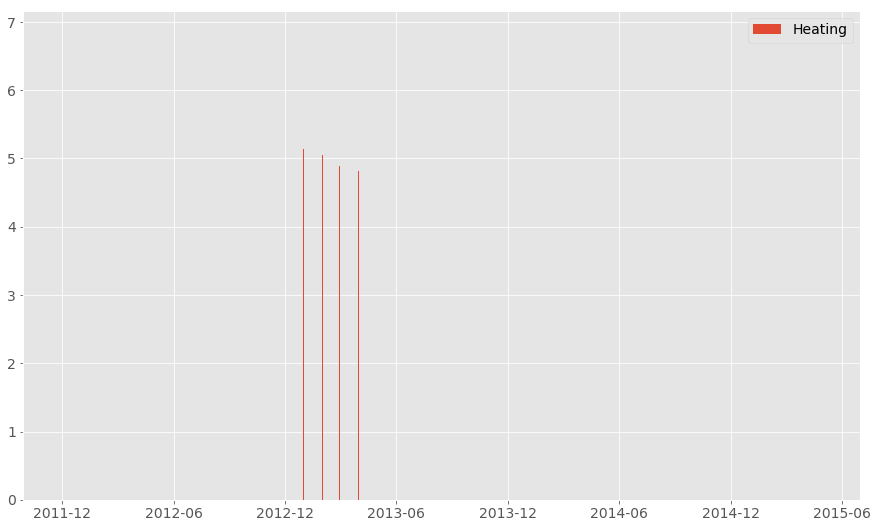

In [109]:
plt.bar(df_heating.index, df_heating['COP 1'], label="Heating", width=0.35)
plt.legend()
plt.show()

In [110]:
x_cooling_DT = df_cooling['TinIC (C)'].as_matrix() - df_cooling['ToutEC (C)'].as_matrix()
y_cooling_DT

NameError: name 'y_cooling_DT' is not defined

In [ ]:
df_cooling.columns

# Now look at aggregating data for double binned analysis

In [ ]:
def is_heat_pump_on(row, threshold):
    if row < threshold:
        return 0
    else:
        return 1

In [ ]:
df['Is HP On'] = df['P_EC(kW)'].apply(lambda row: is_heat_pump_on(row, 0.05))

In [ ]:
# To aggregate the data into hourly blocks, see the the pd.resample function:
# http://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.resample.html

# pd.groupby may also work

# Resample data at 60 minute intervals
df_agg = df.resample('60T').mean()

# 'Is HP On' becomes 'RT Fraction'
df_agg.columns = df_agg.columns.str.replace('Is HP On', 'RT Fraction')

In [ ]:
df_agg.plot(y=['RT Fraction'], marker='.', linestyle="None")

In [ ]:
# mask_rt_frac = df_agg['RT Fraction'] > 0.9
# df_agg = df_agg[mask_rt_frac]
# df_agg.plot(y=['RT Fraction'], marker='.', linestyle="None")

In [ ]:
df_agg.plot(y=['Mass Flow Rate IC (kg/h)'], marker='.', linestyle="None")

In [ ]:
mask_flow_rate = df_agg['Mass Flow Rate IC (kg/h)'] > 500
df_agg = df_agg[mask_flow_rate]

In [ ]:
df_agg.plot(y=['Mass Flow Rate IC (kg/h)'], marker='.', linestyle="None")

In [ ]:
df_agg['IC Mean Temp (C)'] = (df_agg['TinIC (C)'] + df_agg['ToutIC (C)']) / 2

In [ ]:
df_agg = df_agg[df_agg['IC Mean Temp (C)'].notnull()]

In [ ]:
df_agg['CP (kJ/kg-K)'] = df_agg['IC Mean Temp (C)'].apply(get_cp)

In [ ]:
plt.plot(df_agg['ToutIC (C)'] - df_agg['TinIC (C)'], marker='.', linestyle="None")

Note: we must explicitly copy to a new DataFrame here or we will be working on a slice of the original DataFrame

In [ ]:
mask_heating = (df_agg['ToutIC (C)'] - df_agg['TinIC (C)']) > 0
df_heating = df_agg[mask_heating].copy()

In [ ]:
mask_cooling = ~mask_heating
df_cooling = df_agg[mask_cooling].copy()

In [ ]:
df_cooling['Cooling Delivered (kW)'] = df_cooling['Mass Flow Rate IC (kg/h)'] * df_cooling['CP (kJ/kg-K)'] * abs(df_cooling['TinIC (C)'] - df_cooling['ToutIC (C)']) / 3600

In [ ]:
df_heating['Heating Delivered (kW)'] = df_heating['Mass Flow Rate IC (kg/h)'] * df_heating['CP (kJ/kg-K)'] * abs(df_heating['TinIC (C)'] - df_heating['ToutIC (C)']) / 3600

In [ ]:
df_cooling['COP'] = df_cooling['Cooling Delivered (kW)'] / df_cooling['P_EC(kW)']

In [ ]:
df_heating['COP'] = df_heating['Heating Delivered (kW)'] / df_heating['P_EC(kW)']

In [ ]:
df_cooling.plot(y=['COP'], marker='.', linestyle="None")
plt.gca().set_ylim([0, 8])

In [ ]:
df_heating.plot(y=['COP'], marker='.', linestyle="None")
plt.gca().set_ylim([0, 8])

In [ ]:
def filter_bins_by_count(bin_array, count_array, threshold=10):
    ret_array = np.empty(bin_array.shape)
    ret_array[:] = np.nan
    
    for i in range(bin_array.shape[0]):
        for j in range(bin_array.shape[1]): 
            if count_array[i][j] > threshold:
                ret_array[i][j] = bin_array[i][j]
    
    return ret_array

In [ ]:
def ew_mean(a, window=2):
    return np.convolve(a, np.ones((window,)) / window, mode='valid')

In [ ]:
def plot_double_bin(bin_results, bin_count=None, x_label='', y_label='', legend_label=''):
    
    markers = ['o', 'v', '^', 'x', '+', 'D', '1', '2', '3', '4', '8', 'h', 'H', 'd']
    
    bin_arr = bin_results.statistic
    count_arr = bin_count.statistic

    # If we are not filtering by bin count, plot normal. Otherwise, filter then plot.
    if bin_count is not None:
        bin_arr = bin_results.statistic.transpose()
        count_arr = bin_count.statistic.transpose()
        plt_data = filter_bins_by_count(bin_arr, count_arr)
    else:
        plt_data = bin_results.statistic.transpose()
    
    # print(bin_arr)
    # print(count_arr)
    # print(plt_data)
    
    x_edge = ew_mean(bin_results.x_edge)
    y_edge = ew_mean(bin_results.y_edge)

    for i in range(plt_data.shape[0]):
        
        # In this case, throw away first series
        if i == 0:
            continue
        
        x = x_edge
        y = plt_data[i]
        
        # Don't plot series which are all NaN.
        if True in np.invert(np.isnan(y)):
            plt.plot(x, y, label='{:0.2f}'.format(y_edge[i]), marker=markers[i], markersize=10)           

    plt.legend(title=legend_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.show()

In [ ]:
bin_1 = np.arange(4, 28, 2)#[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]
bin_2 = np.arange(-0.05, 1.15, 0.1) #[-0.125, 0.125, 0.375, 0.625, 0.875, 1.125]

cooling_result = binned_statistic_2d(df_cooling['TinEC (C)'], df_cooling['RT Fraction'], df_cooling['COP'], statistic='mean', bins=[bin_1, bin_2])
heating_result = binned_statistic_2d(df_heating['TinEC (C)'], df_heating['RT Fraction'], df_heating['COP'], statistic='mean', bins=[bin_1, bin_2])

cooling_count = binned_statistic_2d(df_cooling['TinEC (C)'], df_cooling['RT Fraction'], df_cooling['COP'], statistic='count', bins=[bin_1, bin_2])
heating_count = binned_statistic_2d(df_heating['TinEC (C)'], df_heating['RT Fraction'], df_heating['COP'], statistic='count', bins=[bin_1, bin_2])

In [ ]:
bin_1

In [ ]:
bin_2

In [ ]:
plot_double_bin(bin_results=cooling_result, bin_count=cooling_count, x_label="EWT (C)", y_label="COP", legend_label="RT Fraction")

In [ ]:
plot_double_bin(bin_results=heating_result, bin_count=heating_count, x_label="EWT (C)", y_label="COP", legend_label="RT Fraction")